<a href="https://colab.research.google.com/github/erokemwa/Data-Science/blob/main/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total number of students: 958928

Grade Distribution Percentage:
   Grade  Percentage
0      A    0.176551
1     A-    0.807464
2     B+    1.997022
3      B    4.496688
4     B-    7.857420
5     C+   10.359276
6      C   11.650197
7     C-   12.386853
8     D+   13.440529
9      D   15.990147
10    D-   15.797536
11     E    5.040316

Gender Distribution within each Grade:
   Grade  Male_Percentage  Female_Percentage
0      A        67.158890          32.841110
1     A-        63.321710          36.678290
2     B+        57.660574          42.339426
3      B        54.125696          45.874304
4     B-        53.021355          46.978645
5     C+        49.266142          50.732851
6      C        48.129649          51.870351
7     C-        47.292917          52.707083
8     D+        46.621407          53.378593
9      D        47.935226          52.064121
10    D-        52.351687          47.648313
11     E        58.388679          41.611321

Most common grade: D
Least common gr

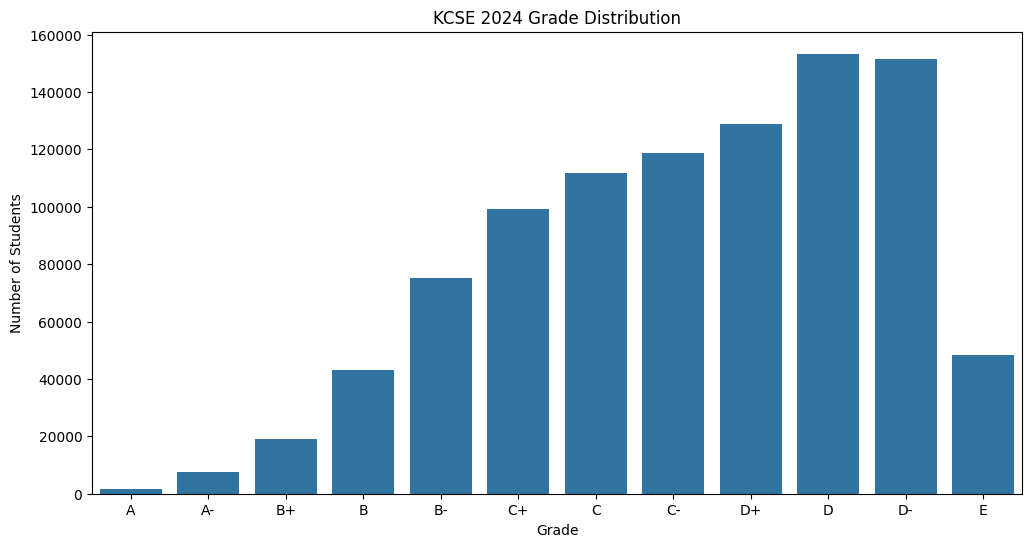

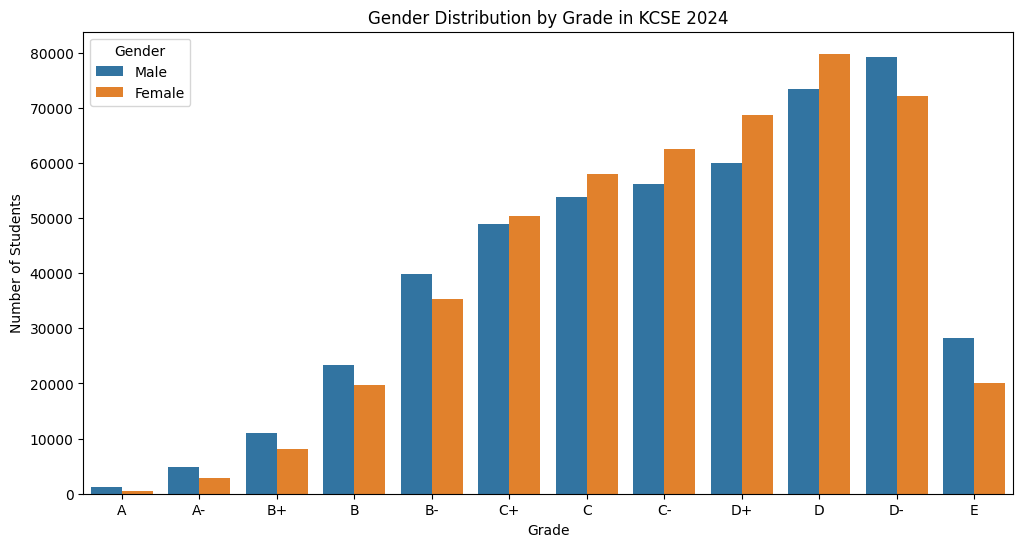

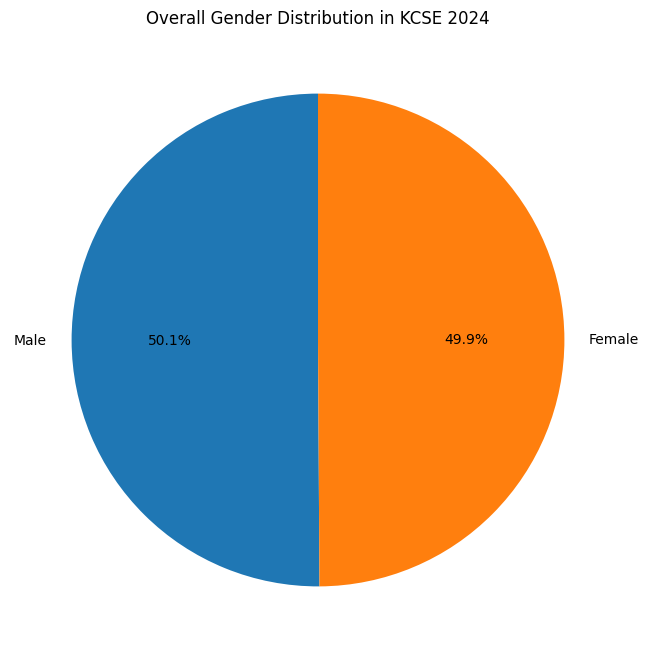

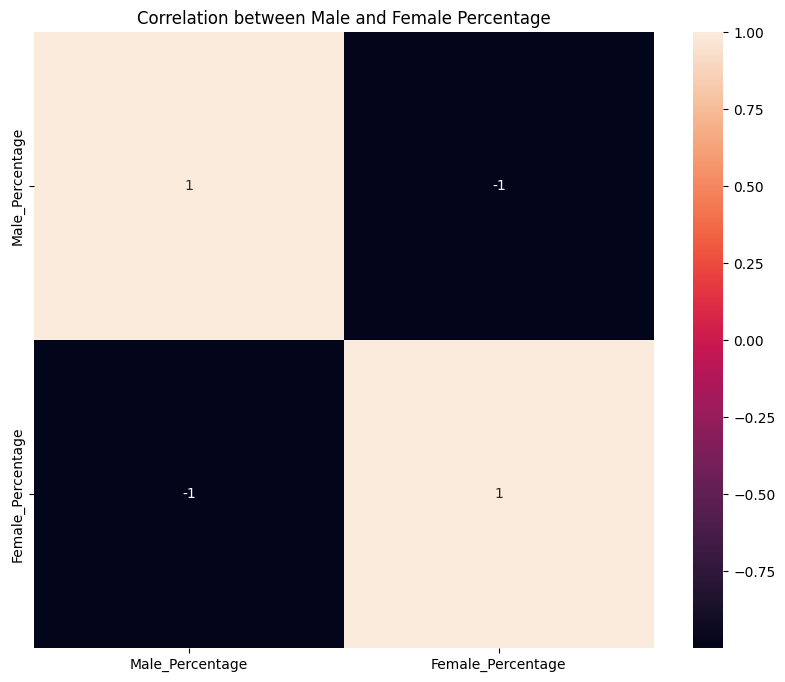

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Manually inputting the data from the image into a dictionary
data = {
    'Grade': ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E'],
    'Number': [1693, 7743, 19150, 43120, 75347, 99338, 111717, 118781, 128885, 153334, 151487, 48333],
    'Male': [1137, 4903, 11042, 23339, 39950, 48940, 53769, 56175, 60088, 73501, 79306, 28221],
    'Female': [556, 2840, 8108, 19781, 35397, 50397, 57948, 62606, 68797, 79832, 72181, 20112]
}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Function to analyze the grade distribution
def analyze_grade_distribution(df):
    # Total number of students
    total_students = df['Number'].sum()
    print(f"Total number of students: {total_students}")

    # Percentage of students for each grade
    df['Percentage'] = (df['Number'] / total_students) * 100
    print("\nGrade Distribution Percentage:")
    print(df[['Grade', 'Percentage']])

    # Gender distribution analysis
    df['Male_Percentage'] = (df['Male'] / df['Number']) * 100
    df['Female_Percentage'] = (df['Female'] / df['Number']) * 100
    print("\nGender Distribution within each Grade:")
    print(df[['Grade', 'Male_Percentage', 'Female_Percentage']])

    # Most common grade
    most_common_grade = df.loc[df['Number'].idxmax(), 'Grade']
    print(f"\nMost common grade: {most_common_grade}")

    # Least common grade
    least_common_grade = df.loc[df['Number'].idxmin(), 'Grade']
    print(f"Least common grade: {least_common_grade}")

    # Gender with higher performance in top grades
    top_grades = df[df['Grade'].isin(['A', 'A-'])]
    male_top = top_grades['Male'].sum()
    female_top = top_grades['Female'].sum()
    if male_top > female_top:
        print("Males have a higher number in top grades (A, A-).")
    else:
        print("Females have a higher number in top grades (A, A-).")

    # Correlation between grade and gender distribution
    correlation = df['Male_Percentage'].corr(df['Female_Percentage'])
    print(f"\nCorrelation between male and female distribution across grades: {correlation}")

# Run the analysis
analyze_grade_distribution(df)

# 1. Bar Plot of Grade Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Grade', y='Number', data=df)
plt.title('KCSE 2024 Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.show()

# 2. Stacked Bar Plot for Gender Distribution
df_melted = pd.melt(df, id_vars=['Grade'], value_vars=['Male', 'Female'], var_name='Gender', value_name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Grade', y='Count', hue='Gender', data=df_melted)
plt.title('Gender Distribution by Grade in KCSE 2024')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.show()

# 3. Pie Chart of Total Gender Distribution
gender_totals = df[['Male', 'Female']].sum()
plt.figure(figsize=(8, 8))
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Gender Distribution in KCSE 2024')
plt.show()

# 4. Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Male_Percentage', 'Female_Percentage']].corr(), annot=True)
plt.title('Correlation between Male and Female Percentage')
plt.show()